<a href="https://colab.research.google.com/github/OConnorsphysics/Uleth_Data_Science/blob/main/Liams_EDA_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://drive.google.com/uc?export=view&id=1Lv8NU_SuGQ9uVjU8N6_NwNi72qbSnbQL'>

# <font color='lightblue'>Exploritory Data Analysis</font>

In this project you will perform an exploritory data analysis (EDA) using visualizations and correlations. You may choose from one of the datasets within the [class shared data folder](https://drive.google.com/drive/folders/1s2Civxvys_SR1sFF7D2ept1GSmFbICQb?usp=sharing), or search for a dataset that interests you the most! [Kaggle](https://www.kaggle.com/datasets?fileType=csv) is a good place to start, as they often have relatively clean and easy to use datasets, but feel free to explore other places. There is a lot of data out there!

In this project you will:

1.  Choose and download a dataset
2.  Get summary statistics for key variables
3.  Create visuals to help understand your data
4.  Use correlation to measure relationships between key variables
5.  Summarise how EDA helped (or not!) in understanding your dataset



Import python libraries


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## <font color='lightblue'>1. Data </font>

**Action:** Import your data into colaboratory.


I chose a top spotify hits dataset from kaggle as my first set of data to explore. This set includes the top 2000 tracks from 2000-2019. I selected it as it had a high usability rating and was sizeable in both dimensions. It is imported as a .csv file from the kaggle link below. A detailed description of each column is given on kaggle.
 
https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019





In [ ]:
df_songs = pd.read_csv('/content/songs_normalize.csv')
df_songs

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


**Action:** Determine the types of data are you dealing with.

In [ ]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


## <font color='lightblue'>2. Summary statistics</font>

Below I use Dataframe.describe() to get an initial idea of the ranges of values to expect from each column.

In [ ]:
df_songs['duration'] = df_songs.duration_ms/1000

In [ ]:
df_songs.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667437,0.720366,5.378000,-5.512435,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558,228.748125
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112,39.136569
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000,113.000000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750,203.580000
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500,223.279500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500,248.133000
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000,484.146000


From the .describe() function we can see all counts are equal, therefore we shouldn't have to deal with any NaN or false zero values. 
The mean song length is 228748 ms or 3 minutes and 48 seconds. 

## <font color='lightblue'>3. Visualize the data</font>

**Action:** Visualize the distribution of values for some key variables

**Q1:** Explain your choice of plots using the five visualization components: 
1. Data component -- what kinds of data are you dealing with?
2. Graphical component -- what kinds of plot can you use?
3. Label component -- what should be on the plot axis?
4. Esthetic component -- what should you plot say, and how best to do this?
5. Ethical component -- Is the graph misleading, what is left out?

I want to get a visual of which artists have multiple hit songs in our top 2000. First I'll build a new dataframe using value_counts method and then visualize the counts per artist with a scatter plot. In this case a histogram or packed circle chart would also work.

In [ ]:
df_artist = df_songs.artist.value_counts().to_frame('counts').reset_index()
df_artist.columns = ['artist', 'counts']
print(df_artist[df_artist.counts >5])

                   artist  counts
0                 Rihanna      25
1                   Drake      23
2                  Eminem      21
3           Calvin Harris      20
4          Britney Spears      19
..                    ...     ...
69         Ellie Goulding       6
70          Mary J. Blige       6
71                Ashanti       6
72            Alicia Keys       6
73  Red Hot Chili Peppers       6

[74 rows x 2 columns]


I plotted the number of top 2000 for each artist who had more than 15 hits. There are over 800 unique artists in the list, most having less than 5 hits. 

Text(0.5, 1.0, 'Artists With Over 15 Songs In The Top 2000 (2000-2020)')

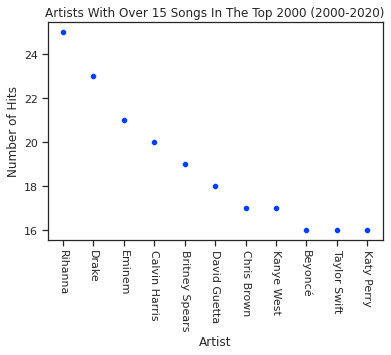

In [ ]:
sns.scatterplot(data=df_artist[df_artist.counts >15], x='artist', y='counts').set(xlabel='Artist',ylabel='Number of Hits')
plt.xticks(rotation=-90)
plt.title('Artists With Over 15 Songs In The Top 2000 (2000-2020)')

We can see there are only eleven artists with more than 15 songs in our dataframe. When all artist's song counts are plotted it appears to fall off exponentially. At first glance it may convey to the viewer that Katy Perry is not a very successful musician. As these names are well known we know this not to be true. If the dataset was dealing with lesser known variables and categories this could become misleading. 

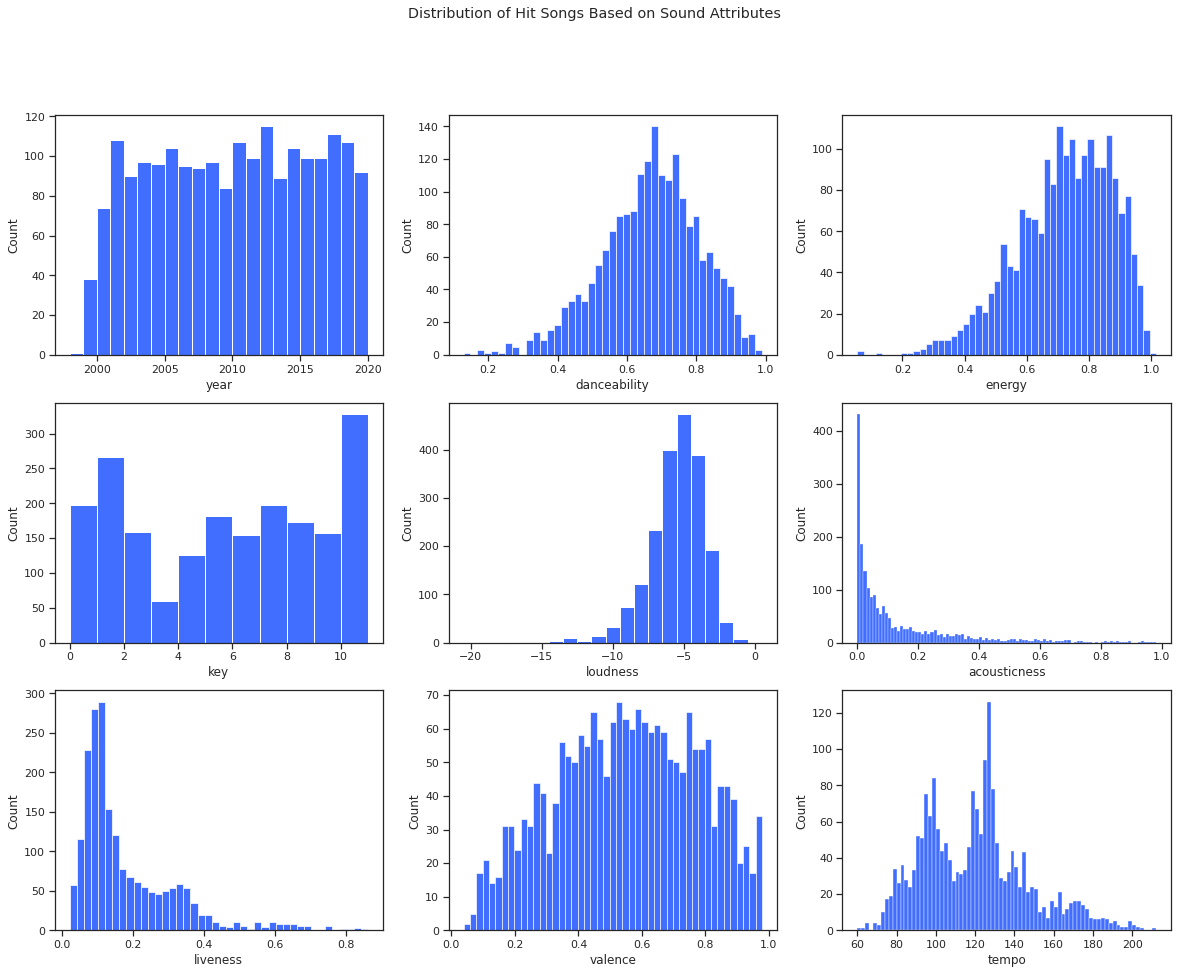

In [ ]:
sns.set()
sns.set_style('ticks')
sns.set_palette("bright")
fig, axes = plt.subplots(3, 3, figsize=(20,15))
fig.suptitle('Distribution of Hit Songs Based on Sound Attributes')

sns.histplot(data=df_songs, ax=axes[0,0], x=df_songs['year'], binwidth=1)

sns.histplot(data=df_songs, ax=axes[0,1], x=df_songs['danceability'], binwidth=0.02)

sns.histplot(data=df_songs, ax=axes[0,2], x=df_songs['energy'], binwidth=0.02)

sns.histplot(data=df_songs, ax=axes[1,0], x=df_songs['key'], binwidth=1)

sns.histplot(data=df_songs, ax=axes[1,1], x=df_songs['loudness'], binwidth=1)

sns.histplot(data=df_songs, ax=axes[1,2], x=df_songs['acousticness'], binwidth=0.01)

sns.histplot(data=df_songs, ax=axes[2,0], x=df_songs['liveness'], binwidth=0.02)

sns.histplot(data=df_songs, ax=axes[2,1], x=df_songs['valence'], binwidth=0.02)

sns.histplot(data=df_songs, ax=axes[2,2], x=df_songs['tempo'], binwidth=2)

I chose to use a histogram to display the majority of the variables. In using a histogram I am hoping to display a quick look at the distribution of each variable. This will tell us if a certain attribute can be connected to being a popular, hit song. 

 Some vairables were not included as they seemed redundant. For example, Speechiness is a measure of how much spoken word is in a song, and instrumentalness is a measure of the lack of words.  

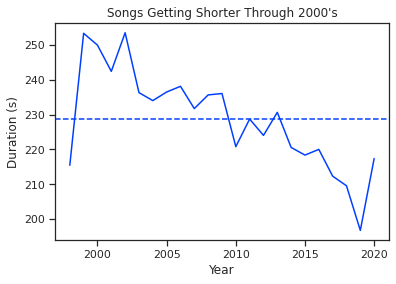

In [ ]:
sns.lineplot(data=df_songs, x='year',y='duration', ci = None)
plt.xlabel("Year")
plt.ylabel("Duration (s)")
plt.title('Songs Getting Shorter Through 2000\'s')
plt.axhline(df_songs['duration'].mean(), ls='--') 

This simple line plot shows that over the last 20 years popular songs tend to be of shorter duration. This is until 2020 when we see a large uptick in duration. It also appears that songs before the 2000's were preferred to be shorter. This seems misleading as when you investigate the number of songs frome each year (below) you see there are only 3 songs from 2020, and 1 from 1988. It is likely that these songs are not a good representation of the data for those years. 

In [ ]:
df_songs.year.value_counts()

2012    115
2017    111
2001    108
2018    107
2010    107
2014    104
2005    104
2011     99
2016     99
2015     99
2003     97
2008     97
2004     96
2006     95
2007     94
2002     90
2019     89
2013     89
2009     84
2000     74
1999     38
2020      3
1998      1
Name: year, dtype: int64

## <font color='lightblue'>4. Correlations</font>

**Action:** Use correlation to estimate the relationship between some of the key variables. Try exploring for interesting relationships using heatmaps.

In [ ]:
df_songs.corr().round(decimals=1)

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
duration_ms,1.0,0.1,-0.3,0.1,-0.1,-0.1,-0.0,-0.1,-0.0,0.1,0.0,-0.0,0.0,-0.1,-0.0,1.0
explicit,0.1,1.0,0.1,0.0,0.2,-0.2,0.0,-0.1,0.0,0.4,-0.0,-0.1,0.0,-0.0,0.0,0.1
year,-0.3,0.1,1.0,-0.0,0.0,-0.1,0.0,0.0,-0.0,0.0,0.0,-0.1,-0.0,-0.2,0.1,-0.3
popularity,0.1,0.0,-0.0,1.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.1
danceability,-0.1,0.2,0.0,-0.0,1.0,-0.1,0.0,-0.0,-0.1,0.1,-0.1,0.0,-0.1,0.4,-0.2,-0.1
energy,-0.1,-0.2,-0.1,-0.0,-0.1,1.0,-0.0,0.7,-0.0,-0.1,-0.4,0.0,0.2,0.3,0.2,-0.1
key,-0.0,0.0,0.0,0.0,0.0,-0.0,1.0,-0.0,-0.2,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0
loudness,-0.1,-0.1,0.0,0.0,-0.0,0.7,-0.0,1.0,-0.0,-0.1,-0.3,-0.1,0.1,0.2,0.1,-0.1
mode,-0.0,0.0,-0.0,-0.0,-0.1,-0.0,-0.2,-0.0,1.0,-0.0,0.0,-0.0,0.0,-0.1,0.0,-0.0
speechiness,0.1,0.4,0.0,0.0,0.1,-0.1,0.0,-0.1,-0.0,1.0,0.0,-0.1,0.1,0.1,0.1,0.1


Text(0.5, 1.0, 'Correlation Between Song Attributes In Top 2000 Songs (2000-2020)')

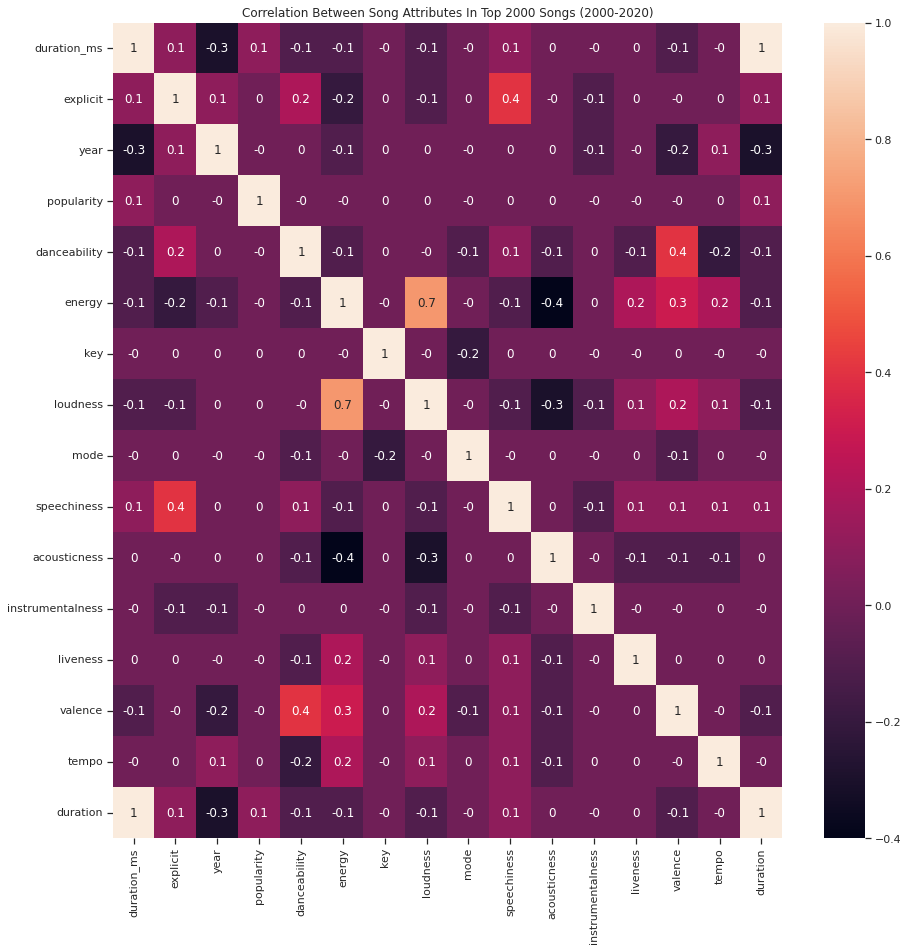

In [ ]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_songs.corr().round(decimals=1), annot=True)
plt.title('Correlation Between Song Attributes In Top 2000 Songs (2000-2020)')

**Q2:** Choose one or two correlations and describe what the magnitude and direction of the correlation suggests about the relationship between the two variables.

The first interesting take away from the correlation heatmap is that the populariy variable has little correlation with any other variable. I assume this is because all the songs in our dataset have a high popularity. With a more diverse range of songs we may see different trends emerge. If one was trying to determine the best metrics for song creation getting data of songs with verying popularity may improve the accuracy of a model. 

Some unsuprising correlations are the strong positive correlation between loudness and energy. Another non supprising correlation is the weak negative correlation showing that acoustic songs are less energetic and less loud, on average. Looking at explicitness and speechiness one should not be suprised to some a weak positive correlation. Not all songs will have explicit language, but songs without words can't have any at all. 

## <font color='lightblue'>5. Discussion</font>

**Q3:** Did this exploritory data analysis help you better understand your chosen dataset? If so how? Is there still parts that don't make sense? 
> The idea with this question is not to see if you know everything about this dataset, just how EDA might have helped (or not!).

Yes, I understand most aspects of the dataset better. I think I may need a stronger understanding of music to understand the intricacies of variables such as key, mode, and tempo. Other than those variables it is easy to see from the correlation heatmap what variables influence similar trends. I initially approached the dataset as though I was intending to create the "perfect song" algorithmically. I believe if you wanted to use machine learning to do this you would need a dataset with a larger range of popularity values. I would also be interested in which genres would be considered favourable, and how that has evolved over time. 


### Convert to PDF

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic


Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-fonts-recommended is already the newest version (2017.20180305-1).
texlive-plain-generic is already the newest version (2017.20180305-2).
texlive-xetex is already the newest version (2017.20180305-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [93]:
!jupyter nbconvert --to pdf /content/Liams_EDA_Project1.ipynb

[NbConvertApp] Converting notebook /content/Liams_EDA_Project1.ipynb to pdf
[NbConvertApp] Support files will be in Liams_EDA_Project1_files/
[NbConvertApp] Making directory ./Liams_EDA_Project1_files
[NbConvertApp] Making directory ./Liams_EDA_Project1_files
[NbConvertApp] Making directory ./Liams_EDA_Project1_files
[NbConvertApp] Making directory ./Liams_EDA_Project1_files
[NbConvertApp] Writing 60530 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 221197 bytes to /content/Liams_EDA_Project1.pdf
